In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_1=pd.read_csv(r"D:\ExcelR\ASSIGNMENTS\14\Fraud_check.csv")
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data_1.shape

(600, 6)

In [4]:
data_1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
data_1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Data preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data_1['Undergrad']=le.fit_transform(data_1['Undergrad'])
data_1['Marital.Status']=le.fit_transform(data_1['Marital.Status'])
data_1['Urban']=le.fit_transform(data_1['Urban'])
data_1.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [9]:
data_1.insert(6,'tax_category','')
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


In [10]:
import warnings
warnings.filterwarnings('ignore')

#### converting taxable income to category of 0 and 1

In [11]:
for i in range(0,len(data_1['tax_category']),1):
    if data_1['Taxable.Income'][i]<=30000:
        data_1['tax_category'][i]='1'
    else:
        data_1['tax_category'][i]='0'

In [12]:
data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [13]:
data_1['tax_category'].unique()

array(['0', '1'], dtype=object)

In [14]:
data_1['tax_category']=data_1['tax_category'].astype(int)

In [15]:
data_1.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
tax_category       int32
dtype: object

### Model building

In [16]:
x=data_1.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=data_1['tax_category']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [19]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Model testing

In [20]:
y_pred_train=dt_model.predict(x_train)
y_pred_test=dt_model.predict(x_test)

### Model Evaluation

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [22]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       101

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.14      0.13      0.13        23

    accuracy                           0.68       120
   macro avg       0.47      0.47      0.47       120
weighted avg       0.67      0.68      0.67       120



In [23]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.675


In [24]:
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

[[379   0]
 [  0 101]]
[[78 19]
 [20  3]]


<AxesSubplot:>

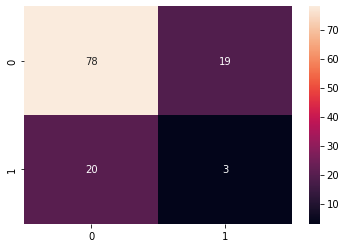

In [25]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [26]:
auc_train = roc_auc_score(y_train, y_pred_train)
print('auc value for train data',auc_train)
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for train data 1.0
auc value for test data 0.4672792469744509


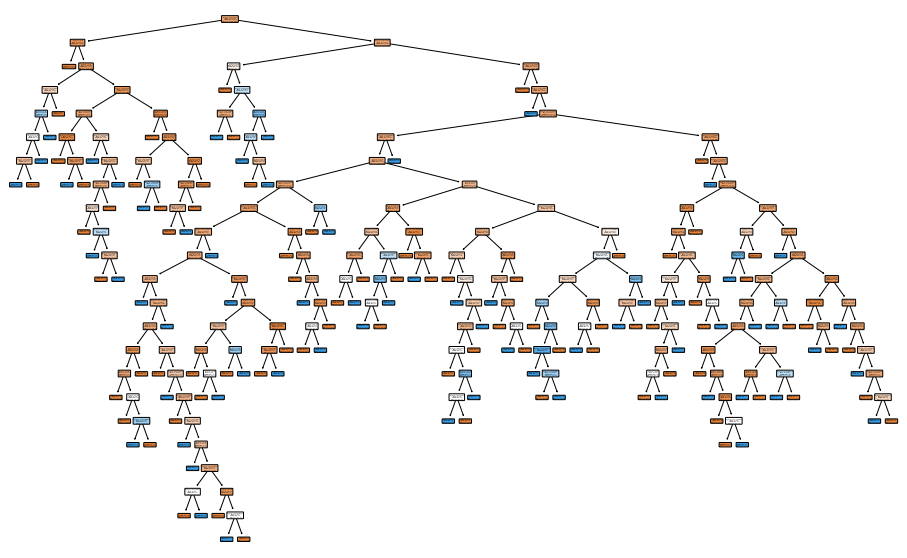

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True)
plt.show()

auc value for test data 0.4672792469744509


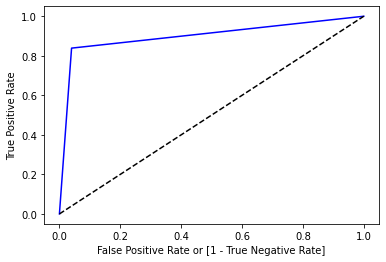

In [28]:
fpr, tpr, thresholds = roc_curve(y,dt_model.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

### GridsearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.7895833333333333


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model_tweak=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [31]:
dt_model_tweak.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
y_pred_train_tweak=dt_model_tweak.predict(x_train)
y_pred_test_tweak=dt_model_tweak.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        97
           1       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



In [34]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.8083333333333333


In [35]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.5


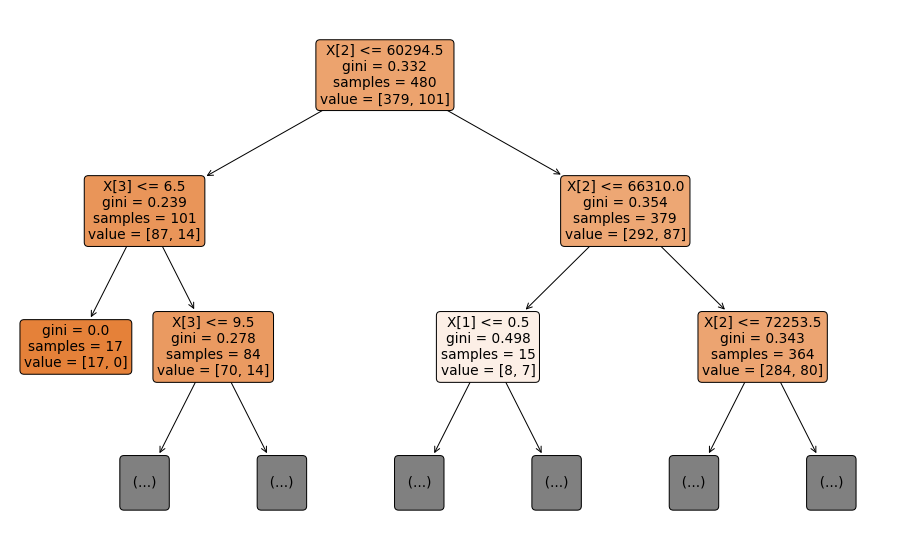

In [36]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True,max_depth=2)
plt.show()

auc value for test data 0.5


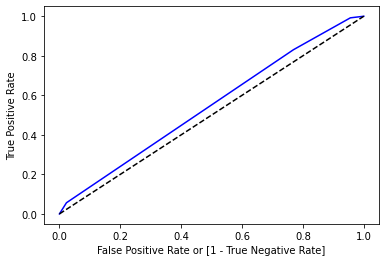

In [37]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y,dt_model_tweak.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

### Check for imbalance

In [38]:
data_1['tax_category'].value_counts()

0    476
1    124
Name: tax_category, dtype: int64

<AxesSubplot:xlabel='tax_category', ylabel='count'>

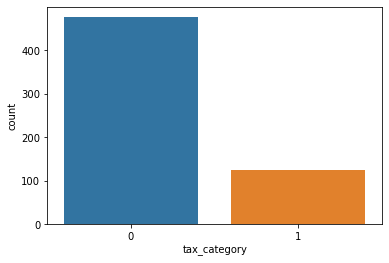

In [39]:
sns.countplot(data_1['tax_category'])

* data are highly imbalanced
* it need to be balanced for obtaining best model

### data balancing by adjusting class weights

In [40]:
dt_model_imb=DecisionTreeClassifier(class_weight={0:1,1:5}).fit(x_train,y_train)

In [41]:
y_pred=dt_model_imb.predict(x_test)

In [42]:
print(accuracy_score(y_test,y_pred))

0.65


<AxesSubplot:>

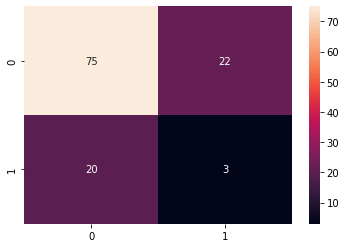

In [43]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

### Data balancing-SMOTE

In [44]:
!pip install imblearn

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote=SMOTE(sampling_strategy='minority')

In [47]:
x_sm,y_sm=smote.fit_resample(x,y)

In [48]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2)

In [49]:
dt_model_smote=DecisionTreeClassifier().fit(x_train_sm,y_train_sm)

In [50]:
y_pred_smote=dt_model_smote.predict(x_test_sm)

In [51]:
print(accuracy_score(y_test_sm,y_pred_smote))

0.7068062827225131


<AxesSubplot:>

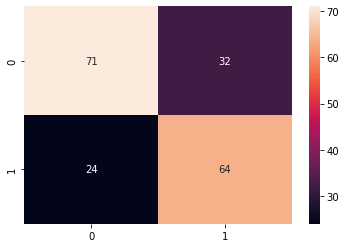

In [52]:
confusion_matrix_test=confusion_matrix(y_test_sm,y_pred_smote)
sns.heatmap(confusion_matrix_test,annot=True)

auc value for test data 0.7082965578111209


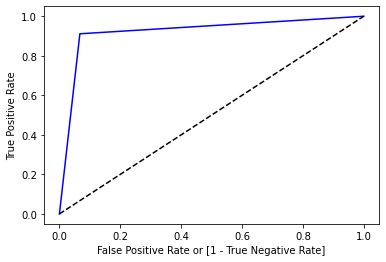

In [53]:
fpr, tpr, thresholds = roc_curve(y,dt_model_smote.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test_sm, y_pred_smote)
print('auc value for test data',auc_test)

* The accuracy gets improved by balancing the data